# House Prices: Advanced Regression Techniques

## ---- DEFINE ----

To examine the data of houses and their corresponding selling prices, draw conclusions from it and predict the sales' prices for a new set of houses on the basis of these conclusions. 

In [1]:
# import the required libraries
import math, random
import pandas as pd
pd.set_option('display.max_columns', 1000)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from scipy.stats import boxcox, pearsonr, spearmanr
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import f_regression, VarianceThreshold
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_log_error

# declare author credentials
__author__ = 'Sarvesh Relekar'
__email__ = 'sar265278@gmail.com'

In /home/sarvesh/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /home/sarvesh/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /home/sarvesh/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


## ---- DISCOVER ----

In [2]:
# load and examine the training data
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# load and examine the testing data
df_test = pd.read_csv('test.csv')
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [4]:
# analyze the various statistical quantities related to training data
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
# check the data type of each features as well as the number of non-null tuples
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [6]:
# drop the 'Id' column in data as it is irrelevant to our model
df.drop(['Id'], axis = 1, inplace = True)

In [7]:
# initialize a list of columns to OHE
ohe = []

# initialize another list of columns to drop redundant OHE features
drop_cols = []

# create a dictionary to label encode selected features manually based on EDA
replace_dict = dict()

In [8]:
# filter out numeric columns
num_cols = [x for x in df.columns if (df[x].dtype == 'int64' or df[x].dtype == 'float64') and x!= 'SalePrice']

### Featurewise EDA + Manual Label Encoding / One Hot Encoding       

**Note : Categorical Features ONLY**

#### 1. MSZoning 

In [9]:
df['MSZoning'].value_counts(dropna = False)

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [10]:
df_test['MSZoning'].value_counts(dropna = False)

RL         1114
RM          242
FV           74
C (all)      15
RH           10
NaN           4
Name: MSZoning, dtype: int64

In [11]:
df_test[df_test['MSZoning'].isna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
455,1916,30,NaN,109.0,21780,Grvl,NaN,Reg,Lvl,NaN,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,2,4,1910,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Fa,Fa,CBlock,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,N,FuseA,810,0,0,810,0.0,0.0,1,0,1,1,TA,4,Min1,0,NaN,Detchd,1975.0,Unf,1.0,280.0,TA,TA,N,119,24,0,0,0,0,NaN,NaN,NaN,0,3,2009,ConLD,Normal
756,2217,20,NaN,80.0,14584,Pave,NaN,Reg,Low,AllPub,Inside,Mod,IDOTRR,Norm,Norm,1Fam,1Story,1,5,1952,1952,Gable,CompShg,AsbShng,VinylSd,None,0.0,Fa,Po,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,Wall,Po,N,FuseA,733,0,0,733,0.0,0.0,1,0,2,1,Fa,4,NaN,0,NaN,Attchd,1952.0,Unf,2.0,487.0,Fa,Po,N,0,0,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Abnorml
790,2251,70,NaN,NaN,56600,Pave,NaN,IR1,Low,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2.5Unf,5,1,1900,1950,Hip,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,686.0,686.0,GasA,Ex,Y,SBrkr,1150,686,0,1836,0.0,0.0,2,0,4,1,TA,7,Maj1,0,NaN,Detchd,1900.0,Unf,1.0,288.0,TA,Fa,N,0,0,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal
1444,2905,20,NaN,125.0,31250,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Artery,Norm,1Fam,1Story,1,3,1951,1951,Gable,CompShg,CBlock,VinylSd,None,0.0,TA,Fa,CBlock,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,Y,FuseA,1600,0,0,1600,0.0,0.0,1,1,3,1,TA,6,Mod,0,NaN,Attchd,1951.0,Unf,1.0,270.0,Fa,TA,N,0,0,135,0,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal


In [12]:
# Find tuples similar to entry 455 in the testing data from the training data
df[(df['MSSubClass'] == 30) & (df['LotShape'] == 'Reg') & (df['Neighborhood'] == 'IDOTRR') & (df['HouseStyle'] == '1Story') & (df['Street'] == 'Grvl')]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1061,30,C (all),120.0,18000,Grvl,NaN,Reg,Low,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,3,4,1935,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,Fa,TA,CBlock,TA,TA,No,Unf,0,Unf,0,894,894,GasA,TA,Y,SBrkr,894,0,0,894,0,0,1,0,2,1,TA,6,Typ,0,NaN,Detchd,1994.0,RFn,3,1248,TA,TA,Y,0,20,0,0,0,0,NaN,NaN,Shed,560,8,2008,ConLD,Normal,81000


In [13]:
df_test.at[455, 'MSZoning'] = 'C (all)'

In [14]:
df_test[df_test['MSZoning'].isna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
756,2217,20,NaN,80.0,14584,Pave,NaN,Reg,Low,AllPub,Inside,Mod,IDOTRR,Norm,Norm,1Fam,1Story,1,5,1952,1952,Gable,CompShg,AsbShng,VinylSd,None,0.0,Fa,Po,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,Wall,Po,N,FuseA,733,0,0,733,0.0,0.0,1,0,2,1,Fa,4,NaN,0,NaN,Attchd,1952.0,Unf,2.0,487.0,Fa,Po,N,0,0,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Abnorml
790,2251,70,NaN,NaN,56600,Pave,NaN,IR1,Low,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2.5Unf,5,1,1900,1950,Hip,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,686.0,686.0,GasA,Ex,Y,SBrkr,1150,686,0,1836,0.0,0.0,2,0,4,1,TA,7,Maj1,0,NaN,Detchd,1900.0,Unf,1.0,288.0,TA,Fa,N,0,0,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal
1444,2905,20,NaN,125.0,31250,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Artery,Norm,1Fam,1Story,1,3,1951,1951,Gable,CompShg,CBlock,VinylSd,None,0.0,TA,Fa,CBlock,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,Y,FuseA,1600,0,0,1600,0.0,0.0,1,1,3,1,TA,6,Mod,0,NaN,Attchd,1951.0,Unf,1.0,270.0,Fa,TA,N,0,0,135,0,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal


In [15]:
# Find tuples similar to entries 756 and 1444 in the testing data from the training data
df[(df['MSSubClass'] == 20) & (df['LotShape'] == 'Reg') & (df['Neighborhood'] == 'Mitchel') & (df['HouseStyle'] == '1Story') & (df['Street'] == 'Pave')]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
71,20,RL,69.0,7599,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Mitchel,Norm,Norm,1Fam,1Story,4,6,1982,2006,Gable,CompShg,HdBoard,Plywood,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,565,Unf,0,280,845,GasA,TA,Y,SBrkr,845,0,0,845,1,0,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1987.0,Unf,2,360,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal,129500
201,20,RL,75.0,10125,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,6,6,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,641,LwQ,279,276,1196,GasA,TA,Y,SBrkr,1279,0,0,1279,0,1,2,0,3,1,TA,6,Typ,2,Fa,Detchd,1980.0,Unf,2,473,TA,TA,Y,238,83,0,0,0,0,NaN,MnPrv,NaN,0,2,2008,WD,Normal,171500
274,20,RL,76.0,8314,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1982,1982,Gable,CompShg,HdBoard,ImStucc,None,0.0,TA,TA,CBlock,TA,TA,Gd,ALQ,546,Unf,0,270,816,GasA,TA,Y,SBrkr,816,0,0,816,0,0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1982.0,Unf,1,264,TA,TA,Y,168,0,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal,124500
422,20,RL,100.0,21750,Pave,NaN,Reg,HLS,AllPub,Inside,Mod,Mitchel,Artery,Norm,1Fam,1Story,5,5,1954,1954,Hip,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,988,988,GasA,Ex,Y,FuseA,988,0,0,988,0,0,1,0,2,1,TA,4,Typ,0,NaN,Attchd,1954.0,RFn,2,520,TA,TA,N,0,0,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,113000
513,20,RL,71.0,9187,Pave,NaN,Reg,Bnk,AllPub,Corner,Gtl,Mitchel,Norm,Norm,1Fam,1Story,6,5,1983,1983,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,PConc,TA,TA,No,ALQ,336,Unf,0,748,1084,GasA,TA,Y,SBrkr,1080,0,0,1080,0,0,1,1,3,1,TA,5,Typ,0,NaN,Attchd,1983.0,Unf,2,484,TA,TA,Y,120,0,158,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal,134000
561,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,1Story,5,5,1974,1975,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,Gd,TA,Av,ALQ,1071,LwQ,123,195,1389,GasA,Gd,Y,SBrkr,1389,0,0,1389,1,0,1,0,2,1,TA,6,Typ,1,TA,Attchd,1975.0,RFn,2,418,TA,TA,Y,240,38,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000
592,20,RL,60.0,6600,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,8,1982,2003,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,Gd,PConc,TA,Gd,No,GLQ,816,Unf,0,0,816,GasA,Ex,Y,SBrkr,816,0,0,816,1,0,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1985.0,Fin,2,816,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal,138000
613,20,RL,70.0,8402,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Feedr,Norm,1Fam,1Story,5,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,ALQ,206,Unf,0,914,1120,GasA,Ex,Y,SBrkr,1120,0,0,1120,0,0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,30,0,0,0,0,NaN,NaN,NaN,0,12,2007,New,Partial,147000
876,20,RL,94.0,25286,Pave,NaN,Reg,HLS,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,1Story,4,5,1963,1963,Gable,CompShg,HdBoard,Plywood,None,0.0,TA,TA,PConc,TA,TA,Gd,ALQ,633,Unf,0,431,1064,GasA,Gd,Y,SBrkr,1040,0,0,1040,1,0,1,0,3,1,TA,5,Typ,0,NaN,Attchd,1963.0,Unf,2,648,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,1,2007,WD,Normal,132250
1048,20,RL,100.0,21750,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,4,1960,2006,Hip,CompShg,HdBoard,HdBoard,BrkFace,75.0,TA,Fa,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,SBrkr,1771,0,0,1771,0,0,1,0,3,1,TA,9,Min1,1,TA,Attchd,196

In [16]:
# Fill missing values manually using indices 
df_test.at[756, 'MSZoning'] = 'RL'
df_test.at[1444, 'MSZoning'] = 'RL'

In [17]:
# check for missing values
df_test[df_test['MSZoning'].isna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
790,2251,70,NaN,NaN,56600,Pave,NaN,IR1,Low,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2.5Unf,5,1,1900,1950,Hip,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,686.0,686.0,GasA,Ex,Y,SBrkr,1150,686,0,1836,0.0,0.0,2,0,4,1,TA,7,Maj1,0,NaN,Detchd,1900.0,Unf,1.0,288.0,TA,Fa,N,0,0,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


In [18]:
# Due to distinctly large value for LotArea, investigate training data for similar values
df_test[df_test['LotArea'] > 50000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
790,2251,70,NaN,NaN,56600,Pave,NaN,IR1,Low,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2.5Unf,5,1,1900,1950,Hip,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,686.0,686.0,GasA,Ex,Y,SBrkr,1150,686,0,1836,0.0,0.0,2,0,4,1,TA,7,Maj1,0,NaN,Detchd,1900.0,Unf,1.0,288.0,TA,Fa,N,0,0,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal
803,2264,20,RL,52.0,51974,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,StoneBr,PosN,Norm,1Fam,1Story,9,5,2006,2007,Hip,CompShg,VinylSd,VinylSd,BrkFace,710.0,Ex,TA,PConc,Ex,TA,Av,GLQ,1101.0,Unf,0.0,1559.0,2660.0,GasA,Ex,Y,SBrkr,2338,0,0,2338,1.0,0.0,2,1,4,1,Gd,8,Typ,2,Gd,Attchd,2005.0,Fin,3.0,1110.0,Gd,TA,Y,0,135,0,0,322,0,NaN,NaN,NaN,0,6,2007,New,Partial
1440,2901,20,RL,NaN,50102,Pave,NaN,IR1,Low,AllPub,Inside,Mod,Timber,Norm,Norm,1Fam,1Story,6,5,1958,1958,Gable,Tar&Grv,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,Gd,BLQ,909.0,Unf,0.0,723.0,1632.0,GasA,TA,Y,SBrkr,1650,0,0,1650,1.0,0.0,1,0,2,1,TA,6,Typ,2,Gd,Attchd,1958.0,Unf,2.0,518.0,TA,TA,Y,0,0,0,0,138,0,NaN,NaN,NaN,0,3,2006,WD,Alloca


In [19]:
df_test.at[790, 'MSZoning'] = 'RL'

In [20]:
# Final confirmation for no remaining missing tuples in testing data 
df_test['MSZoning'].isna().sum()

0

In [21]:
df['SalePrice'].groupby(df['MSZoning']).mean()

MSZoning
C (all)     74528.000000
FV         214014.061538
RH         131558.375000
RL         191004.994787
RM         126316.830275
Name: SalePrice, dtype: float64

In [22]:
df['SalePrice'].groupby(df['MSZoning']).max()

MSZoning
C (all)    133900
FV         370878
RH         200000
RL         755000
RM         475000
Name: SalePrice, dtype: int64

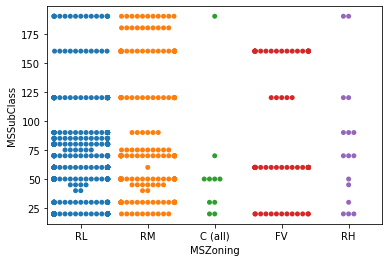

In [23]:
sns.swarmplot(x = 'MSZoning', y = 'MSSubClass', data = df)

In [24]:
# generate key value pair to replace categorical feature values with corresponding numeric values
# where :
# key : feature name (for eg. MSZoning)
# value : Dictionary of Label Encoded feature values inferred via EDA
replace_dict['MSZoning'] = {'FV': 4, 'RL': 3, 'RH': 2, 'RM': 1, 'C (all)': 0}

#### 2. LotConfig 

In [25]:
df['LotConfig'].value_counts(dropna = False)

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

In [26]:
df_test['LotConfig'].value_counts(dropna = False)

Inside     1081
Corner      248
CulDSac      82
FR2          38
FR3          10
Name: LotConfig, dtype: int64

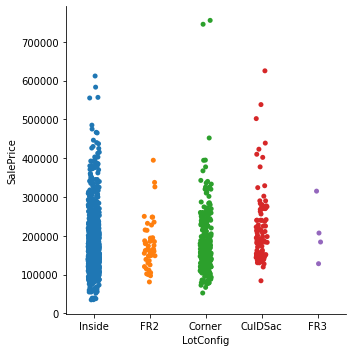

In [27]:
sns.catplot(x = 'LotConfig', y = 'SalePrice', data = df)

In [28]:
df['SalePrice'].groupby(df['LotConfig']).mean()

LotConfig
Corner     181623.425856
CulDSac    223854.617021
FR2        177934.574468
FR3        208475.000000
Inside     176938.047529
Name: SalePrice, dtype: float64

In [29]:
df['SalePrice'].groupby(df['LotConfig']).max()

LotConfig
Corner     755000
CulDSac    625000
FR2        394617
FR3        315000
Inside     611657
Name: SalePrice, dtype: int64

In [30]:
# Due to no direct relation between LotConfig and SalePrice, 
# we perform one hot encoding
ohe.append('LotConfig')

#### 3. LotShape 

In [31]:
df['LotShape'].value_counts(dropna = False)

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

In [32]:
df_test['LotShape'].value_counts(dropna = False)

Reg    934
IR1    484
IR2     35
IR3      6
Name: LotShape, dtype: int64

In [33]:
df['SalePrice'].groupby(df['LotShape']).mean()

LotShape
IR1    206101.665289
IR2    239833.365854
IR3    216036.500000
Reg    164754.818378
Name: SalePrice, dtype: float64

In [34]:
df['SalePrice'].groupby(df['LotShape']).max()

LotShape
IR1    755000
IR2    538000
IR3    375000
Reg    582933
Name: SalePrice, dtype: int64

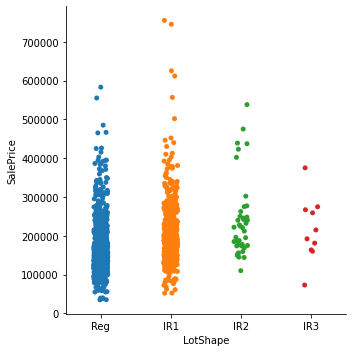

In [35]:
sns.catplot(x = 'LotShape', y = 'SalePrice', data = df)

In [36]:
ohe.append('LotShape')

#### 4. Street

In [37]:
df['Street'].value_counts(dropna = False)

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [38]:
df_test['Street'].value_counts(dropna = False)

Pave    1453
Grvl       6
Name: Street, dtype: int64

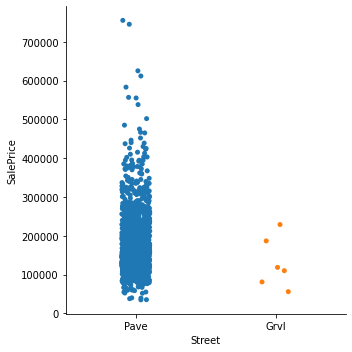

In [39]:
sns.catplot(x = 'Street', y = 'SalePrice', data = df)

In [40]:
df['SalePrice'].groupby(df['Street']).mean()

Street
Grvl    130190.500000
Pave    181130.538514
Name: SalePrice, dtype: float64

In [41]:
df['SalePrice'].groupby(df['Street']).max()

Street
Grvl    228950
Pave    755000
Name: SalePrice, dtype: int64

In [42]:
ohe.append('Street')
# One Hot Encoding generates 2 features namely 'Street_Pave' and
# 'Street_Grvl', so removing one of these can help keep the number
# of extra features to a bare minimum
drop_cols.append('Street_Grvl')
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### 5. Alley

In [43]:
df['Alley'].value_counts(dropna = False)

NaN     1369
Grvl      50
Pave      41
Name: Alley, dtype: int64

In [44]:
df_test['Alley'].value_counts(dropna = False)

NaN     1352
Grvl      70
Pave      37
Name: Alley, dtype: int64

In [45]:
# Fill missing values with 'None' to represent 'No Alley' 
df['Alley'].fillna('None', inplace = True)
df_test['Alley'].fillna('None', inplace = True)

In [46]:
df_test['Alley'].value_counts(dropna = False)

None    1352
Grvl      70
Pave      37
Name: Alley, dtype: int64

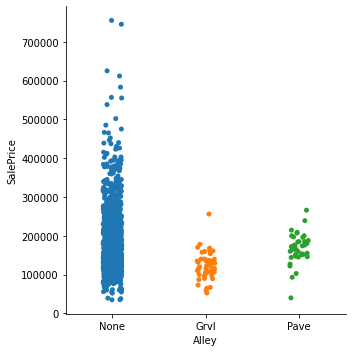

In [47]:
sns.catplot(x = 'Alley', y = 'SalePrice', data = df)

In [48]:
df['SalePrice'].groupby(df['Alley']).mean()

Alley
Grvl    122219.080000
None    183452.131483
Pave    168000.585366
Name: SalePrice, dtype: float64

In [49]:
df['SalePrice'].groupby(df['Alley']).max()

Alley
Grvl    256000
None    755000
Pave    265979
Name: SalePrice, dtype: int64

In [50]:
replace_dict['Alley'] = {'None': 2, 'Pave': 1, 'Grvl': 0}

#### 7. LandContour

In [51]:
df['LandContour'].value_counts(dropna = False)

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

In [52]:
df_test['LandContour'].value_counts(dropna = False)

Lvl    1311
HLS      70
Bnk      54
Low      24
Name: LandContour, dtype: int64

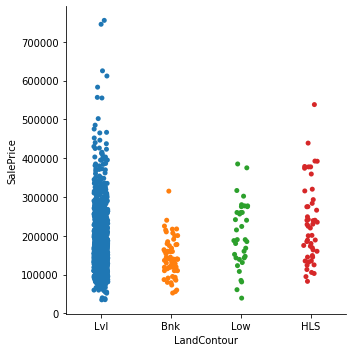

In [53]:
sns.catplot(x = 'LandContour', y = 'SalePrice', data = df)

In [54]:
df['SalePrice'].groupby(df['LandContour']).mean()

LandContour
Bnk    143104.079365
HLS    231533.940000
Low    203661.111111
Lvl    180183.746758
Name: SalePrice, dtype: float64

In [55]:
df['SalePrice'].groupby(df['LandContour']).max()

LandContour
Bnk    315000
HLS    538000
Low    385000
Lvl    755000
Name: SalePrice, dtype: int64

In [56]:
replace_dict['LandContour'] = {'Lvl': 3, 'HLS': 2, 'Low': 1, 'Bnk': 0}

#### 8. Utilities

In [57]:
df['Utilities'].value_counts(dropna = False)

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [58]:
df[df['Utilities'] == 'NoSeWa']

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
944,20,RL,NaN,14375,Pave,None,IR1,Lvl,NoSeWa,CulDSac,Gtl,Timber,Norm,Norm,1Fam,SLvl,6,6,1958,1958,Gable,CompShg,HdBoard,HdBoard,BrkFace,541.0,TA,TA,CBlock,TA,TA,No,GLQ,111,Rec,354,354,819,GasA,Gd,Y,FuseA,1344,0,0,1344,0,1,1,0,3,1,Gd,7,Typ,1,Gd,Basment,1958.0,RFn,2,525,TA,TA,Y,0,118,0,0,233,0,NaN,NaN,NaN,0,1,2009,COD,Abnorml,137500


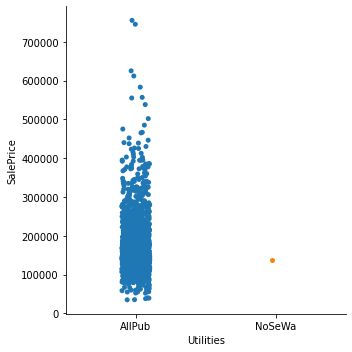

In [59]:
sns.catplot(x = 'Utilities', y = 'SalePrice', data = df)

In [60]:
df['SalePrice'].groupby(df['Utilities']).mean()

Utilities
AllPub    180950.95682
NoSeWa    137500.00000
Name: SalePrice, dtype: float64

In [61]:
df['SalePrice'].groupby(df['Utilities']).max()

Utilities
AllPub    755000
NoSeWa    137500
Name: SalePrice, dtype: int64

In [62]:
df_test['Utilities'].value_counts(dropna = False)

AllPub    1457
NaN          2
Name: Utilities, dtype: int64

In [63]:
df_test[df_test['Utilities'].isna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
455,1916,30,C (all),109.0,21780,Grvl,None,Reg,Lvl,NaN,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,2,4,1910,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Fa,Fa,CBlock,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,N,FuseA,810,0,0,810,0.0,0.0,1,0,1,1,TA,4,Min1,0,NaN,Detchd,1975.0,Unf,1.0,280.0,TA,TA,N,119,24,0,0,0,0,NaN,NaN,NaN,0,3,2009,ConLD,Normal
485,1946,20,RL,NaN,31220,Pave,None,IR1,Bnk,NaN,FR2,Gtl,Gilbert,Feedr,Norm,1Fam,1Story,6,2,1952,1952,Hip,CompShg,BrkFace,BrkFace,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,1632.0,1632.0,GasA,TA,Y,FuseA,1474,0,0,1474,0.0,0.0,1,0,3,1,TA,7,Min2,2,Gd,Attchd,1952.0,Unf,2.0,495.0,TA,TA,Y,0,0,144,0,0,0,NaN,NaN,Shed,750,5,2008,WD,Normal


In [64]:
df[(df['MSSubClass'] == 30) & (df['HouseStyle'] == '1Story') & (df['CentralAir'] == 'N')]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
29,30,RM,60.0,6324,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,BrkSide,Feedr,RRNn,1Fam,1Story,4,6,1927,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,520,520,GasA,Fa,N,SBrkr,520,0,0,520,0,0,1,0,1,1,Fa,4,Typ,0,NaN,Detchd,1920.0,Unf,1,240,Fa,TA,Y,49,0,87,0,0,0,NaN,NaN,NaN,0,5,2008,WD,Normal,68500
98,30,RL,85.0,10625,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,5,1920,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,No,ALQ,108,Unf,0,350,458,GasA,Fa,N,SBrkr,835,0,0,835,0,0,1,0,2,1,TA,5,Typ,0,NaN,Basment,1920.0,Unf,1,366,Fa,TA,Y,0,0,77,0,0,0,NaN,NaN,Shed,400,5,2010,COD,Abnorml,83000
210,30,RL,67.0,5604,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1925,1950,Gable,CompShg,Stucco,Stucco,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468,Unf,0,396,864,GasA,TA,N,FuseA,864,0,0,864,1,0,1,0,2,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,96,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Normal,98000
264,30,RM,30.0,5232,Pave,Grvl,IR3,Bnk,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1Story,5,5,1925,2004,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,Fa,TA,No,Unf,0,Unf,0,680,680,GasA,Gd,N,FuseP,764,0,0,764,0,0,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1965.0,Unf,2,504,TA,TA,N,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal,73000
375,30,RL,NaN,10020,Pave,None,IR1,Low,AllPub,Inside,Sev,Edwards,Norm,Norm,1Fam,1Story,1,1,1922,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Fa,Fa,BrkTil,Fa,Po,Gd,BLQ,350,Unf,0,333,683,GasA,Gd,N,FuseA,904,0,0,904,1,0,0,1,1,1,Fa,4,Maj1,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,3,2009,WD,Normal,61000
438,30,RL,40.0,4280,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,1Story,5,6,1913,2002,Gable,CompShg,WdShing,Stucco,None,0.0,TA,TA,PConc,TA,TA,No,LwQ,365,Unf,0,75,440,GasA,TA,N,SBrkr,694,0,0,694,0,0,1,0,2,1,Gd,4,Typ,1,Gd,Detchd,1990.0,Unf,1,352,Gd,TA,P,0,0,34,0,0,0,NaN,MnPrv,NaN,0,3,2007,WD,Normal,90350
495,30,C (all),60.0,7879,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,4,5,1920,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,495,Unf,0,225,720,GasA,TA,N,FuseA,720,0,0,720,0,0,1,0,2,1,TA,4,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,N,0,523,115,0,0,0,NaN,GdWo,NaN,0,11,2009,WD,Abnorml,34900
620,30,RL,45.0,8248,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,3,3,1914,1950,Gable,CompShg,Stucco,Stucco,None,0.0,TA,TA,BrkTil,TA,TA,No,BLQ,41,Unf,0,823,864,GasA,TA,N,FuseF,864,0,0,864,1,0,1,0,2,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,100,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,67000
636,30,RM,51.0,6120,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1Story,2,3,1936,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,Fa,Fa,BrkTil,TA,Fa,No,Unf,0,Unf,0,264,264,Grav,Fa,N,FuseA,800,0,0,800,0,0,1,0,1,1,Fa,4,Maj1,1,Po,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,0,0,0,0,NaN,NaN,NaN,0,1,2009,ConLw,Normal,60000
896,30,RM,50.0,8765,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,4,6,1936,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,No,ALQ,285,Unf,0,666,951,GasA,Ex,N,SBrkr,951,0,0,951,0,0,1,0,2,1,TA,6,Typ,0,NaN,Detchd,1936.0,Unf,1,327,TA,TA,Y,0,28,0,0,0,0,NaN,NaN

In [65]:
df_test['Utilities'].fillna('AllPub', inplace = True)

In [66]:
df_test['Utilities'].value_counts()

AllPub    1459
Name: Utilities, dtype: int64

In [67]:
ohe.append('Utilities')
drop_cols.append('Utilities_NoSeWa')

#### 9. LandSlope

In [68]:
df['LandSlope'].value_counts(dropna = False)

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

In [69]:
df_test['LandSlope'].value_counts(dropna = False)

Gtl    1396
Mod      60
Sev       3
Name: LandSlope, dtype: int64

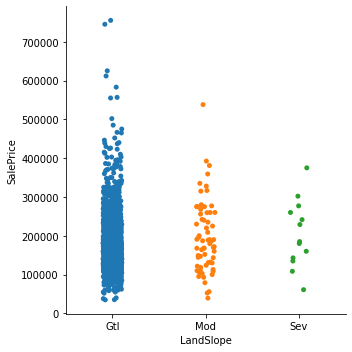

In [70]:
sns.catplot(x = 'LandSlope', y = 'SalePrice', data = df)

In [71]:
df['SalePrice'].groupby(df['LandSlope']).mean()

LandSlope
Gtl    179956.799566
Mod    196734.138462
Sev    204379.230769
Name: SalePrice, dtype: float64

In [72]:
df['SalePrice'].groupby(df['LandSlope']).max()

LandSlope
Gtl    755000
Mod    538000
Sev    375000
Name: SalePrice, dtype: int64

In [73]:
ohe.append('LandSlope')

#### 10. Neighborhood

In [74]:
df['Neighborhood'].value_counts(dropna = False)

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [75]:
df_test['Neighborhood'].value_counts(dropna = False)

NAmes      218
OldTown    126
CollgCr    117
Somerst     96
Edwards     94
NridgHt     89
Gilbert     86
Sawyer      77
SawyerW     66
Mitchel     65
NWAmes      58
IDOTRR      56
Crawfor     52
BrkSide     50
Timber      34
NoRidge     30
StoneBr     26
SWISU       23
MeadowV     20
ClearCr     16
BrDale      14
NPkVill     14
Veenker     13
Blmngtn     11
Blueste      8
Name: Neighborhood, dtype: int64

In [76]:
df['SalePrice'].groupby(df['Neighborhood']).mean()

Neighborhood
Blmngtn    194870.882353
Blueste    137500.000000
BrDale     104493.750000
BrkSide    124834.051724
ClearCr    212565.428571
CollgCr    197965.773333
Crawfor    210624.725490
Edwards    128219.700000
Gilbert    192854.506329
IDOTRR     100123.783784
MeadowV     98576.470588
Mitchel    156270.122449
NAmes      145847.080000
NPkVill    142694.444444
NWAmes     189050.068493
NoRidge    335295.317073
NridgHt    316270.623377
OldTown    128225.300885
SWISU      142591.360000
Sawyer     136793.135135
SawyerW    186555.796610
Somerst    225379.837209
StoneBr    310499.000000
Timber     242247.447368
Veenker    238772.727273
Name: SalePrice, dtype: float64

In [77]:
ohe.append('Neighborhood')

#### 11. Condition1

In [78]:
df['Condition1'].value_counts(dropna = False)

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

In [79]:
df_test['Condition1'].value_counts(dropna = False)

Norm      1251
Feedr       83
Artery      44
RRAn        24
PosN        20
RRAe        17
PosA        12
RRNn         4
RRNe         4
Name: Condition1, dtype: int64

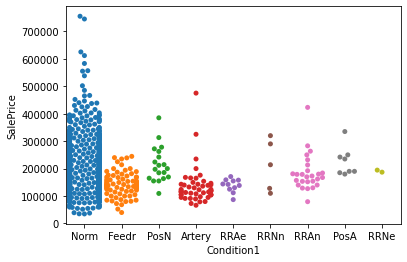

In [80]:
sns.swarmplot(x = 'Condition1', y = 'SalePrice', data = df)

In [81]:
df['SalePrice'].groupby(df['Condition1']).mean()

Condition1
Artery    135091.666667
Feedr     142475.481481
Norm      184495.492063
PosA      225875.000000
PosN      215184.210526
RRAe      138400.000000
RRAn      184396.615385
RRNe      190750.000000
RRNn      212400.000000
Name: SalePrice, dtype: float64

In [82]:
ohe.append('Condition1')

#### 12. Condition2

In [83]:
df['Condition2'].value_counts(dropna = False)

Norm      1445
Feedr        6
Artery       2
RRNn         2
PosN         2
RRAn         1
PosA         1
RRAe         1
Name: Condition2, dtype: int64

In [84]:
df_test['Condition2'].value_counts(dropna = False)

Norm      1444
Feedr        7
Artery       3
PosA         3
PosN         2
Name: Condition2, dtype: int64

In [85]:
# drop columns with certain values for Condition2 due to 
# these not being present in the test set and may adversely affect OHE
df.drop(df[df['Condition2'] == 'RRNn'].index, inplace = True)
df.drop(df[df['Condition2'] == 'RRAe'].index, inplace = True)
df.drop(df[df['Condition2'] == 'RRAn'].index, inplace = True)

In [86]:
df['Condition2'].value_counts(dropna = False)

Norm      1445
Feedr        6
Artery       2
PosN         2
PosA         1
Name: Condition2, dtype: int64

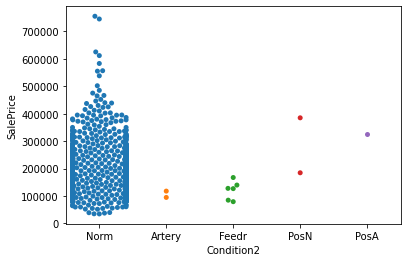

In [87]:
sns.swarmplot(x = 'Condition2', y = 'SalePrice', data = df)

In [88]:
ohe.append('Condition2')

In [89]:
df['SalePrice'].groupby(df['Condition2']).mean()

Condition2
Artery    106500.000000
Feedr     121166.666667
Norm      181169.405536
PosA      325000.000000
PosN      284875.000000
Name: SalePrice, dtype: float64

#### 13. BldgType

In [90]:
df['BldgType'].value_counts(dropna = False)

1Fam      1218
TwnhsE     114
Duplex      50
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

In [91]:
df_test['BldgType'].value_counts(dropna = False)

1Fam      1205
TwnhsE     113
Duplex      57
Twnhs       53
2fmCon      31
Name: BldgType, dtype: int64

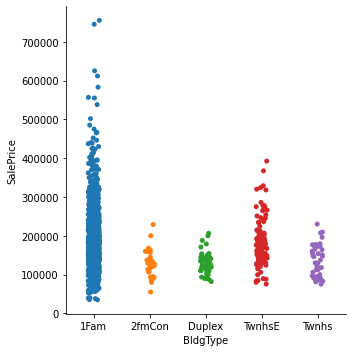

In [92]:
sns.catplot(x = 'BldgType', y = 'SalePrice', data = df)

In [93]:
df['SalePrice'].groupby(df['BldgType']).mean()

BldgType
1Fam      185909.971264
2fmCon    128432.258065
Duplex    132344.620000
Twnhs     135911.627907
TwnhsE    181959.342105
Name: SalePrice, dtype: float64

In [94]:
df['SalePrice'].groupby(df['BldgType']).max()

BldgType
1Fam      755000
2fmCon    228950
Duplex    206300
Twnhs     230000
TwnhsE    392500
Name: SalePrice, dtype: int64

In [95]:
replace_dict['BldgType'] = {'1Fam': 4, 'TwnhsE': 3, 'Twnhs': 2, 'Duplex': 1, '2fmCon': 0}

#### 14. HouseStyle

In [96]:
df['HouseStyle'].value_counts(dropna = False)

1Story    723
2Story    445
1.5Fin    153
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

In [97]:
df_test['HouseStyle'].value_counts(dropna = False)

1Story    745
2Story    427
1.5Fin    160
SLvl       63
SFoyer     46
2.5Unf     13
1.5Unf      5
Name: HouseStyle, dtype: int64

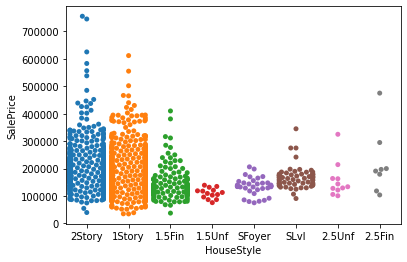

In [98]:
sns.swarmplot(x = 'HouseStyle', y = 'SalePrice', data = df)

In [99]:
df['SalePrice'].groupby(df['HouseStyle']).mean()

HouseStyle
1.5Fin    142810.313725
1.5Unf    110150.000000
1Story    176258.716459
2.5Fin    220000.000000
2.5Unf    157354.545455
2Story    210051.764045
SFoyer    135074.486486
SLvl      166703.384615
Name: SalePrice, dtype: float64

In [100]:
df['SalePrice'].groupby(df['HouseStyle']).max()

HouseStyle
1.5Fin    410000
1.5Unf    139400
1Story    611657
2.5Fin    475000
2.5Unf    325000
2Story    755000
SFoyer    206300
SLvl      345000
Name: SalePrice, dtype: int64

In [101]:
ohe.append('HouseStyle')

#### 15. YearBuilt

In [102]:
df['YearBuilt'].value_counts(dropna = False)

2006    67
2005    64
2004    54
2007    49
2003    45
1976    32
1977    31
1920    30
1959    26
1999    25
1998    25
1958    24
1965    24
1970    24
1954    24
2000    24
2002    23
2008    23
1972    23
1968    22
1971    22
1950    20
2001    20
1957    20
1962    19
1994    19
1966    18
2009    18
1995    18
1940    18
        ..
1986     5
1952     5
1880     4
1929     4
1932     4
1938     4
1983     4
1919     3
1934     3
1989     3
1987     3
1912     3
1927     2
1885     2
1892     2
1890     2
1942     2
1908     2
1882     1
1875     1
1893     1
2010     1
1898     1
1904     1
1905     1
1906     1
1911     1
1913     1
1917     1
1872     1
Name: YearBuilt, Length: 112, dtype: int64

In [103]:
df['SalePrice'].groupby(df['YearBuilt']).mean()

YearBuilt
1872    122000.000000
1875     94000.000000
1880    200619.750000
1882    168000.000000
1885    111250.000000
1890    142200.000000
1892    291250.000000
1893    325000.000000
1898    106000.000000
1900    112492.600000
1904    157500.000000
1905    163000.000000
1906    135000.000000
1908    183500.000000
1910    111959.058824
1911    130000.000000
1912    119466.666667
1913     90350.000000
1914    126055.285714
1915    134387.500000
1916    139800.000000
1917    129500.000000
1918    172421.428571
1919    154833.333333
1920    112903.333333
1921    140813.333333
1922    109237.500000
1923    159428.571429
1924    105985.714286
1925    129190.625000
            ...      
1981    249880.000000
1982    132400.000000
1983    181400.000000
1984    164111.111111
1985    191400.000000
1986    212000.000000
1987    198000.000000
1988    204636.363636
1989    279500.000000
1990    220881.666667
1991    186140.000000
1992    218384.615385
1993    218058.823529
1994    247900.000000


In [104]:
ohe.append('YearBuilt')

#### 16. RoofStyle

In [105]:
df['RoofStyle'].value_counts(dropna = False)

Gable      1138
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          1
Name: RoofStyle, dtype: int64

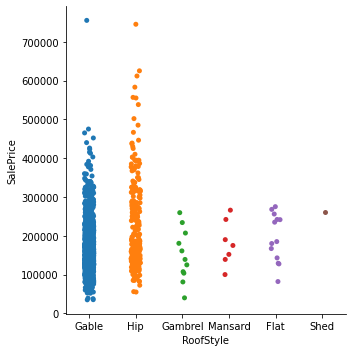

In [106]:
sns.catplot(x = 'RoofStyle', y = 'SalePrice', data = df)

In [107]:
df['SalePrice'].groupby(df['RoofStyle']).mean()

RoofStyle
Flat       194690.000000
Gable      171645.684534
Gambrel    148909.090909
Hip        218876.933566
Mansard    180568.428571
Shed       260000.000000
Name: SalePrice, dtype: float64

In [108]:
df['SalePrice'].groupby(df['RoofStyle']).max()

RoofStyle
Flat       274970
Gable      755000
Gambrel    259500
Hip        745000
Mansard    265979
Shed       260000
Name: SalePrice, dtype: int64

In [109]:
replace_dict['RoofStyle'] = {'Hip': 5, 'Gable': 4, 'Flat': 3, 'Mansard': 2, 'Shed': 1, 'Gambrel': 0}

#### 17. RoofMatl

In [110]:
df['RoofMatl'].value_counts(dropna = False)

CompShg    1430
Tar&Grv      11
WdShngl       6
WdShake       5
Metal         1
ClyTile       1
Roll          1
Membran       1
Name: RoofMatl, dtype: int64

In [111]:
df_test['RoofMatl'].value_counts(dropna = False)

CompShg    1442
Tar&Grv      12
WdShake       4
WdShngl       1
Name: RoofMatl, dtype: int64

In [112]:
df.drop(df[df['RoofMatl'] == 'Roll'].index, inplace = True)
df.drop(df[df['RoofMatl'] == 'Membran'].index, inplace = True)
df.drop(df[df['RoofMatl'] == 'Metal'].index, inplace = True)
df.drop(df[df['RoofMatl'] == 'ClyTile'].index, inplace = True)

In [113]:
# inspect shape after deletion of multiple tuples
df.shape

(1452, 80)

In [114]:
df['RoofMatl'].value_counts(dropna = False)

CompShg    1430
Tar&Grv      11
WdShngl       6
WdShake       5
Name: RoofMatl, dtype: int64

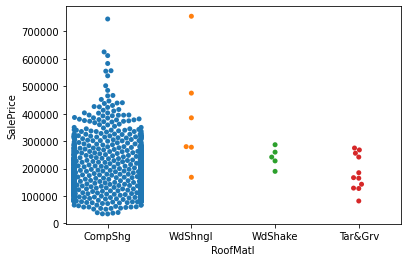

In [115]:
sns.swarmplot(x = 'RoofMatl', y = 'SalePrice', data = df)

In [116]:
df['SalePrice'].groupby(df['RoofMatl']).mean()

RoofMatl
CompShg    179942.706993
Tar&Grv    185406.363636
WdShake    241400.000000
WdShngl    390250.000000
Name: SalePrice, dtype: float64

In [117]:
df['SalePrice'].groupby(df['RoofMatl']).max()

RoofMatl
CompShg    745000
Tar&Grv    274970
WdShake    287000
WdShngl    755000
Name: SalePrice, dtype: int64

In [118]:
replace_dict['RoofMatl'] = {'WdShngl': 3, 'CompShg': 2, 'WdShake': 1, 'Tar&Grv': 0}

#### 18. Exterior1st

In [119]:
df['Exterior1st'].value_counts(dropna = False)

VinylSd    514
HdBoard    222
MetalSd    218
Wd Sdng    206
Plywood    105
CemntBd     61
BrkFace     50
WdShing     26
Stucco      24
AsbShng     19
BrkComm      2
Stone        2
ImStucc      1
AsphShn      1
CBlock       1
Name: Exterior1st, dtype: int64

In [120]:
df_test['Exterior1st'].value_counts(dropna = False)

VinylSd    510
MetalSd    230
HdBoard    220
Wd Sdng    205
Plywood    113
CemntBd     65
BrkFace     37
WdShing     30
AsbShng     24
Stucco      18
BrkComm      4
AsphShn      1
CBlock       1
NaN          1
Name: Exterior1st, dtype: int64

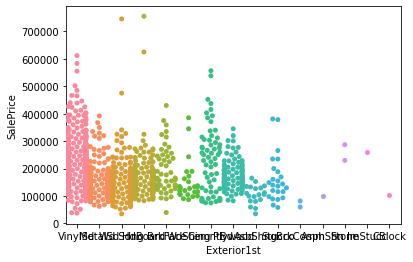

In [121]:
sns.swarmplot(x = 'Exterior1st', y = 'SalePrice', data = df)

In [122]:
df['SalePrice'].groupby(df['Exterior1st']).mean()

Exterior1st
AsbShng    105826.894737
AsphShn    100000.000000
BrkComm     71000.000000
BrkFace    194573.000000
CBlock     105000.000000
CemntBd    231690.655738
HdBoard    163077.450450
ImStucc    262000.000000
MetalSd    149905.408257
Plywood    175145.495238
Stone      258500.000000
Stucco     163114.583333
VinylSd    213882.371595
Wd Sdng    149841.645631
WdShing    150655.076923
Name: SalePrice, dtype: float64

In [123]:
df['SalePrice'].groupby(df['Exterior1st']).max()

Exterior1st
AsbShng    165500
AsphShn    100000
BrkComm     82000
BrkFace    430000
CBlock     105000
CemntBd    556581
HdBoard    755000
ImStucc    262000
MetalSd    392000
Plywood    345000
Stone      287000
Stucco     381000
VinylSd    611657
Wd Sdng    745000
WdShing    385000
Name: SalePrice, dtype: int64

In [124]:
df_test['Exterior1st'].fillna('Wd Sdng', inplace = True)

In [125]:
df_test['Exterior1st'].value_counts(dropna = False)

VinylSd    510
MetalSd    230
HdBoard    220
Wd Sdng    206
Plywood    113
CemntBd     65
BrkFace     37
WdShing     30
AsbShng     24
Stucco      18
BrkComm      4
AsphShn      1
CBlock       1
Name: Exterior1st, dtype: int64

In [126]:
ohe.append('Exterior1st')

#### 19. Exterior2nd

In [127]:
df['Exterior2nd'].value_counts(dropna = False)

VinylSd    503
MetalSd    212
HdBoard    207
Wd Sdng    197
Plywood    139
CmentBd     60
Wd Shng     38
Stucco      25
BrkFace     25
AsbShng     19
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64

In [128]:
df_test['Exterior2nd'].value_counts(dropna = False)

VinylSd    510
MetalSd    233
HdBoard    199
Wd Sdng    194
Plywood    128
CmentBd     66
Wd Shng     43
BrkFace     22
Stucco      21
AsbShng     18
Brk Cmn     15
ImStucc      5
CBlock       2
Stone        1
AsphShn      1
NaN          1
Name: Exterior2nd, dtype: int64

In [129]:
df_test[df_test['Exterior2nd'].isna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
691,2152,30,RL,85.0,19550,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1940,2007,Flat,Tar&Grv,Wd Sdng,NaN,None,0.0,TA,TA,PConc,TA,TA,Gd,ALQ,1035.0,Unf,0.0,545.0,1580.0,GasA,Ex,Y,SBrkr,1518,0,0,1518,1.0,0.0,1,0,2,1,Fa,5,Typ,2,Gd,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,39,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


In [130]:
# check for tuple similar to the above in testing data itself
df_test[(df_test['RoofStyle'] == 'Flat') & (df_test['RoofMatl'] == 'Tar&Grv')]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
133,1594,90,RH,60.0,7200,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,SWISU,Norm,Norm,Duplex,2Story,4,6,1967,1967,Flat,Tar&Grv,Plywood,CBlock,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,Y,SBrkr,862,1788,0,2650,0.0,0.0,3,0,6,2,TA,10,Min2,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,Shed,500,2,2010,WD,Normal
335,1796,20,RL,80.0,9000,Pave,None,IR1,HLS,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Flat,Tar&Grv,Wd Sdng,Wd Sdng,BrkFace,82.0,TA,TA,CBlock,Gd,TA,Gd,Unf,0.0,Unf,0.0,160.0,160.0,GasA,Fa,Y,SBrkr,1142,0,0,1142,0.0,0.0,1,0,2,1,TA,5,Typ,1,Gd,Basment,1958.0,RFn,1.0,384.0,TA,TA,Y,0,28,64,0,0,0,NaN,NaN,NaN,0,4,2009,WD,Normal
686,2147,190,RL,NaN,10532,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,ClearCr,Norm,Norm,1Fam,1Story,5,3,1960,1960,Flat,Tar&Grv,Plywood,Plywood,Stone,275.0,TA,TA,CBlock,TA,TA,Mn,Rec,988.0,Unf,0.0,0.0,988.0,GasA,Gd,Y,SBrkr,1721,0,0,1721,1.0,0.0,2,0,3,1,TA,7,Mod,2,TA,Basment,1960.0,Unf,2.0,626.0,TA,TA,Y,50,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Abnorml
691,2152,30,RL,85.0,19550,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1940,2007,Flat,Tar&Grv,Wd Sdng,NaN,None,0.0,TA,TA,PConc,TA,TA,Gd,ALQ,1035.0,Unf,0.0,545.0,1580.0,GasA,Ex,Y,SBrkr,1518,0,0,1518,1.0,0.0,1,0,2,1,Fa,5,Typ,2,Gd,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,39,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal
704,2165,20,RL,NaN,11500,Pave,None,IR1,Bnk,AllPub,CulDSac,Gtl,ClearCr,Norm,Norm,1Fam,1Story,6,6,1966,1966,Flat,Tar&Grv,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,Gd,Gd,LwQ,262.0,ALQ,723.0,197.0,1182.0,GasA,Ex,Y,SBrkr,1643,0,0,1643,1.0,0.0,2,0,2,1,TA,6,Typ,1,Gd,Attchd,1966.0,Unf,2.0,438.0,TA,TA,Y,339,0,0,0,0,0,NaN,NaN,NaN,0,3,2008,WD,Normal
1356,2817,20,RL,87.0,13050,Pave,None,Reg,Low,AllPub,Inside,Mod,ClearCr,Norm,Norm,1Fam,1Story,5,6,1963,1963,Flat,Tar&Grv,WdShing,Wd Shng,None,0.0,TA,TA,CBlock,Gd,TA,Av,Rec,104.0,ALQ,850.0,46.0,1000.0,GasA,Ex,Y,SBrkr,1000,0,0,1000,1.0,0.0,1,0,1,1,TA,4,Typ,2,TA,Attchd,1993.0,Unf,2.0,575.0,TA,TA,Y,238,0,148,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Normal
1399,2860,90,RL,38.0,7840,Pave,None,IR1,Lvl,AllPub,CulDSac,Gtl,Edwards,Norm,Norm,Duplex,SFoyer,6,5,1975,1975,Flat,Tar&Grv,Plywood,Wd Shng,BrkFace,355.0,TA,TA,CBlock,Gd,TA,Gd,GLQ,976.0,Unf,0.0,0.0,976.0,GasA,TA,Y,SBrkr,1012,0,0,1012,0.0,2.0,2,0,4,0,TA,4,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,10,2006,WD,AdjLand


In [131]:
df.drop(df[df['Exterior2nd'] == 'Other'].index, inplace = True)

In [132]:
df_test['Exterior2nd'].fillna('Wd Sdng', inplace = True)

In [133]:
df_test['Exterior2nd'].value_counts(dropna = False)

VinylSd    510
MetalSd    233
HdBoard    199
Wd Sdng    195
Plywood    128
CmentBd     66
Wd Shng     43
BrkFace     22
Stucco      21
AsbShng     18
Brk Cmn     15
ImStucc      5
CBlock       2
Stone        1
AsphShn      1
Name: Exterior2nd, dtype: int64

In [134]:
df['SalePrice'].groupby(df['Exterior2nd']).mean()

Exterior2nd
AsbShng    112853.210526
AsphShn    138000.000000
Brk Cmn    126714.285714
BrkFace    195818.000000
CBlock     105000.000000
CmentBd    230093.833333
HdBoard    167661.565217
ImStucc    252070.000000
MetalSd    150303.674528
Plywood    167341.431655
Stone      158224.800000
Stucco     155741.360000
VinylSd    214586.590457
Wd Sdng    148386.065990
Wd Shng    161328.947368
Name: SalePrice, dtype: float64

In [135]:
df['SalePrice'].groupby(df['Exterior2nd']).max()

Exterior2nd
AsbShng    225000
AsphShn    175000
Brk Cmn    155000
BrkFace    430000
CBlock     105000
CmentBd    556581
HdBoard    755000
ImStucc    745000
MetalSd    392000
Plywood    320000
Stone      230000
Stucco     381000
VinylSd    611657
Wd Sdng    475000
Wd Shng    538000
Name: SalePrice, dtype: int64

In [136]:
ohe.append('Exterior2nd')

#### 20. MasVnrType

In [137]:
df['MasVnrType'].value_counts(dropna = False)

None       859
BrkFace    443
Stone      126
BrkCmn      15
NaN          8
Name: MasVnrType, dtype: int64

In [138]:
df_test['MasVnrType'].value_counts(dropna = False)

None       878
BrkFace    434
Stone      121
NaN         16
BrkCmn      10
Name: MasVnrType, dtype: int64

In [139]:
df['MasVnrType'].fillna('No', inplace = True)
df_test['MasVnrType'].fillna('No', inplace = True)

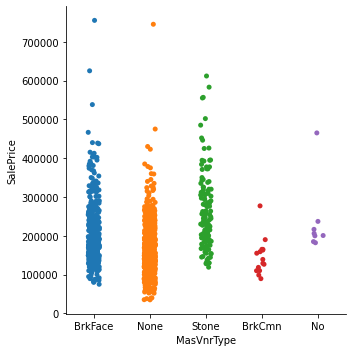

In [140]:
sns.catplot(x = 'MasVnrType', y = 'SalePrice', data = df)

In [141]:
df['SalePrice'].groupby(df['MasVnrType']).mean()

MasVnrType
BrkCmn     146318.066667
BrkFace    204586.857788
No         236484.250000
None       156194.079162
Stone      267442.095238
Name: SalePrice, dtype: float64

In [142]:
df['SalePrice'].groupby(df['MasVnrType']).max()

MasVnrType
BrkCmn     277000
BrkFace    755000
No         465000
None       745000
Stone      611657
Name: SalePrice, dtype: int64

In [143]:
ohe.append('MasVnrType')

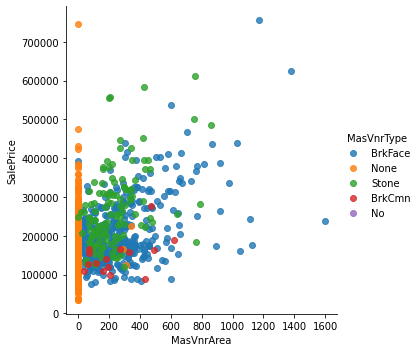

In [144]:
sns.lmplot(x = 'MasVnrArea', y = 'SalePrice', hue = 'MasVnrType', data = df, fit_reg = False)

#### 21. ExterQual

In [145]:
df['ExterQual'].value_counts(dropna = False)

TA    899
Gd    487
Ex     51
Fa     14
Name: ExterQual, dtype: int64

In [146]:
df_test['ExterQual'].value_counts(dropna = False)

TA    892
Gd    491
Ex     55
Fa     21
Name: ExterQual, dtype: int64

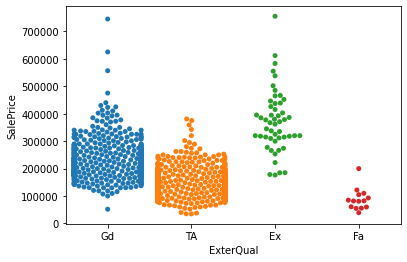

In [147]:
sns.swarmplot(x = 'ExterQual', y = 'SalePrice', data = df)

In [148]:
df['SalePrice'].groupby(df['ExterQual']).mean()

ExterQual
Ex    371426.862745
Fa     87985.214286
Gd    231454.112936
TA    144265.100111
Name: SalePrice, dtype: float64

In [149]:
df['SalePrice'].groupby(df['ExterQual']).max()

ExterQual
Ex    755000
Fa    200000
Gd    745000
TA    381000
Name: SalePrice, dtype: int64

In [150]:
replace_dict['ExterQual'] = {'Ex': 3, 'Gd': 2, 'Fa': 1, 'TA': 0}

#### 22. ExterCond

In [151]:
df['ExterCond'].value_counts(dropna = False)

TA    1274
Gd     145
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64

In [152]:
df_test['ExterCond'].value_counts(dropna = False)

TA    1256
Gd     153
Fa      39
Ex       9
Po       2
Name: ExterCond, dtype: int64

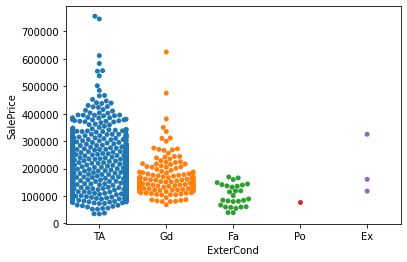

In [153]:
sns.swarmplot(x = 'ExterCond', y = 'SalePrice', data = df)

In [154]:
df['SalePrice'].groupby(df['ExterCond']).mean()

ExterCond
Ex    201333.333333
Fa    102595.142857
Gd    169200.310345
Po     76500.000000
TA    184065.802198
Name: SalePrice, dtype: float64

In [155]:
df['SalePrice'].groupby(df['ExterCond']).max()

ExterCond
Ex    325000
Fa    169500
Gd    625000
Po     76500
TA    755000
Name: SalePrice, dtype: int64

In [156]:
replace_dict['ExterCond'] = {'Ex': 4, 'TA': 3, 'Gd': 2, 'Fa': 1, 'Po': 0}

#### 23. Foundation

In [157]:
df['Foundation'].value_counts(dropna = False)

PConc     645
CBlock    628
BrkTil    145
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64

In [158]:
df_test['Foundation'].value_counts(dropna = False)

PConc     661
CBlock    601
BrkTil    165
Slab       25
Stone       5
Wood        2
Name: Foundation, dtype: int64

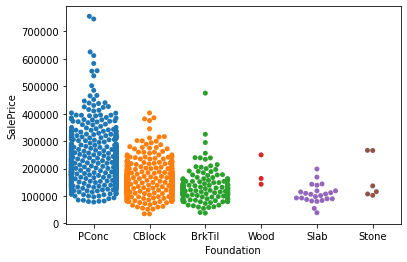

In [159]:
sns.swarmplot(x = 'Foundation', y = 'SalePrice', data = df)

In [160]:
df['SalePrice'].groupby(df['Foundation']).mean()

Foundation
BrkTil    132731.013793
CBlock    149628.054140
PConc     225186.195349
Slab      107365.625000
Stone     165959.166667
Wood      185666.666667
Name: SalePrice, dtype: float64

In [161]:
df['SalePrice'].groupby(df['Foundation']).max()

Foundation
BrkTil    475000
CBlock    402861
PConc     755000
Slab      198500
Stone     266500
Wood      250000
Name: SalePrice, dtype: int64

In [162]:
ohe.append('Foundation')

#### 24. BsmtQual

In [163]:
df['BsmtQual'].value_counts(dropna = False)

TA     644
Gd     615
Ex     120
NaN     37
Fa      35
Name: BsmtQual, dtype: int64

In [164]:
df_test['BsmtQual'].value_counts(dropna = False)

TA     634
Gd     591
Ex     137
Fa      53
NaN     44
Name: BsmtQual, dtype: int64

In [165]:
df['BsmtQual'].fillna('None', inplace = True)
df_test['BsmtQual'].fillna('None', inplace = True)

In [166]:
df['BsmtQual'].isna().sum()

0

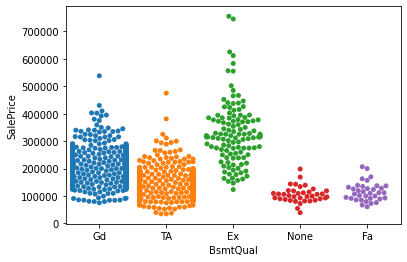

In [167]:
sns.swarmplot(x = 'BsmtQual', y = 'SalePrice', data = df)

In [168]:
df['SalePrice'].groupby(df['BsmtQual']).mean()

BsmtQual
Ex      328433.050000
Fa      115692.028571
Gd      202456.878049
None    105652.891892
TA      140847.386646
Name: SalePrice, dtype: float64

In [169]:
df['SalePrice'].groupby(df['BsmtQual']).max()

BsmtQual
Ex      755000
Fa      206900
Gd      538000
None    198500
TA      475000
Name: SalePrice, dtype: int64

In [170]:
replace_dict['BsmtQual'] = {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'None': 0}

#### 25. BsmtCond

In [171]:
df['BsmtCond'].value_counts(dropna = False)

TA     1302
Gd       65
Fa       45
NaN      37
Po        2
Name: BsmtCond, dtype: int64

In [172]:
df_test['BsmtCond'].value_counts(dropna = False)

TA     1295
Fa       59
Gd       57
NaN      45
Po        3
Name: BsmtCond, dtype: int64

In [173]:
df['BsmtCond'].fillna('None', inplace = True)
df_test['BsmtCond'].fillna('None', inplace = True)

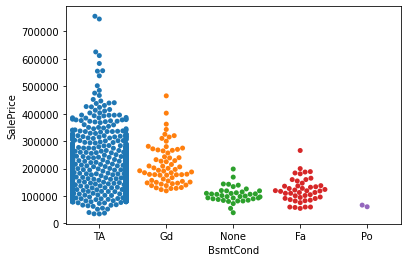

In [174]:
sns.swarmplot(x = 'BsmtCond', y = 'SalePrice', data = df)

In [175]:
df['SalePrice'].groupby(df['BsmtCond']).mean()

BsmtCond
Fa      121809.533333
Gd      213599.907692
None    105652.891892
Po       64000.000000
TA      183705.423195
Name: SalePrice, dtype: float64

In [176]:
df['SalePrice'].groupby(df['BsmtCond']).max()

BsmtCond
Fa      265979
Gd      465000
None    198500
Po       67000
TA      755000
Name: SalePrice, dtype: int64

In [177]:
ohe.append('BsmtCond')

#### 26. BsmtExposure

In [178]:
df['BsmtExposure'].value_counts(dropna = False)

No     948
Av     221
Gd     130
Mn     114
NaN     38
Name: BsmtExposure, dtype: int64

In [179]:
df_test['BsmtExposure'].value_counts(dropna = False)

No     951
Av     197
Gd     142
Mn     125
NaN     44
Name: BsmtExposure, dtype: int64

In [180]:
df['BsmtExposure'].fillna('None', inplace = True)
df_test['BsmtExposure'].fillna('None', inplace = True)

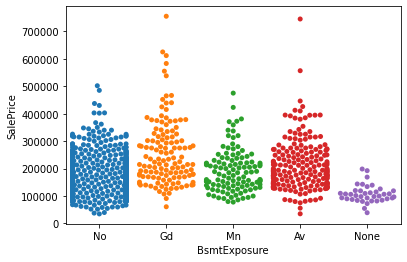

In [181]:
sns.swarmplot(x = 'BsmtExposure', y = 'SalePrice', data = df)

In [182]:
df['SalePrice'].groupby(df['BsmtExposure']).mean()

BsmtExposure
Av      206643.420814
Gd      258691.800000
Mn      192789.657895
No      165832.524262
None    107938.342105
Name: SalePrice, dtype: float64

In [183]:
df['SalePrice'].groupby(df['BsmtExposure']).max()

BsmtExposure
Av      745000
Gd      755000
Mn      475000
No      501837
None    198500
Name: SalePrice, dtype: int64

In [184]:
replace_dict['BsmtExposure'] = {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0}

#### 27. BsmtFinType1

In [185]:
df['BsmtFinType1'].value_counts(dropna = False)

Unf    428
GLQ    415
ALQ    219
BLQ    148
Rec    132
LwQ     72
NaN     37
Name: BsmtFinType1, dtype: int64

In [186]:
df_test['BsmtFinType1'].value_counts(dropna = False)

GLQ    431
Unf    421
ALQ    209
Rec    155
BLQ    121
LwQ     80
NaN     42
Name: BsmtFinType1, dtype: int64

In [187]:
df['BsmtFinType1'].fillna('None', inplace = True)
df_test['BsmtFinType1'].fillna('None', inplace = True)

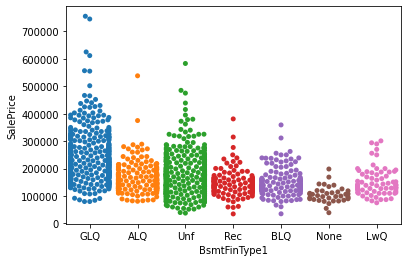

In [188]:
sns.swarmplot(x = 'BsmtFinType1', y = 'SalePrice', data = df)

In [189]:
df['SalePrice'].groupby(df['BsmtFinType1']).mean()

BsmtFinType1
ALQ     161488.926941
BLQ     149493.655405
GLQ     235503.457831
LwQ     150980.555556
None    105652.891892
Rec     146964.166667
Unf     170988.184579
Name: SalePrice, dtype: float64

In [190]:
df['SalePrice'].groupby(df['BsmtFinType1']).max()

BsmtFinType1
ALQ     538000
BLQ     359100
GLQ     755000
LwQ     301000
None    198500
Rec     381000
Unf     582933
Name: SalePrice, dtype: int64

In [191]:
replace_dict['BsmtFinType1'] = {'GLQ': 6, 'Unf': 5, 'ALQ': 4, 'BLQ': 3, 'LwQ': 2, 'Rec': 1, 'None': 0}

#### 28. BsmtFinType2

In [192]:
df['BsmtFinType2'].value_counts(dropna = False)

Unf    1250
Rec      52
LwQ      46
NaN      38
BLQ      33
ALQ      19
GLQ      13
Name: BsmtFinType2, dtype: int64

In [193]:
df_test['BsmtFinType2'].value_counts(dropna = False)

Unf    1237
Rec      51
NaN      42
LwQ      41
BLQ      35
ALQ      33
GLQ      20
Name: BsmtFinType2, dtype: int64

In [194]:
df['BsmtFinType2'].fillna('None', inplace = True)
df_test['BsmtFinType2'].fillna('None', inplace = True)

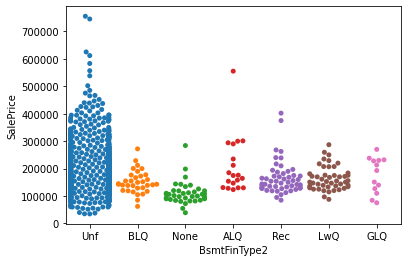

In [195]:
sns.swarmplot(x = 'BsmtFinType2', y = 'SalePrice', data = df)

In [196]:
df['SalePrice'].groupby(df['BsmtFinType2']).mean()

BsmtFinType2
ALQ     209942.105263
BLQ     151101.000000
GLQ     176326.923077
LwQ     164364.130435
None    110346.236842
Rec     165202.403846
Unf     184780.100800
Name: SalePrice, dtype: float64

In [197]:
df['SalePrice'].groupby(df['BsmtFinType2']).max()

BsmtFinType2
ALQ     555000
BLQ     271900
GLQ     270000
LwQ     287000
None    284000
Rec     402000
Unf     755000
Name: SalePrice, dtype: int64

In [198]:
ohe.append('BsmtFinType2')

#### 29. Heating

In [199]:
df['Heating'].value_counts(dropna = False)

GasA     1419
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64

In [200]:
df_test['Heating'].value_counts(dropna = False)

GasA    1446
GasW       9
Wall       2
Grav       2
Name: Heating, dtype: int64

In [201]:
df.drop(df[df['Heating'] == 'OthW'].index, inplace = True)
df.drop(df[df['Heating'] == 'Floor'].index, inplace = True)

In [202]:
df['Heating'].value_counts(dropna = False)

GasA    1419
GasW      18
Grav       7
Wall       4
Name: Heating, dtype: int64

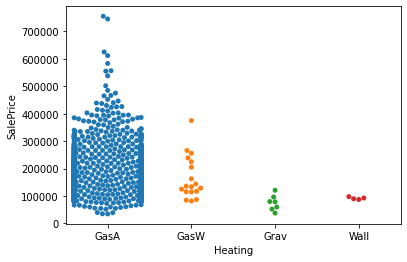

In [203]:
sns.swarmplot(x = 'Heating', y = 'SalePrice', data = df)

In [204]:
df['SalePrice'].groupby(df['Heating']).mean()

Heating
GasA    182077.774489
GasW    166632.166667
Grav     75271.428571
Wall     92100.000000
Name: SalePrice, dtype: float64

In [205]:
df['SalePrice'].groupby(df['Heating']).max()

Heating
GasA    755000
GasW    375000
Grav    121000
Wall     98000
Name: SalePrice, dtype: int64

In [206]:
replace_dict['Heating'] = {'GasA': 3, 'GasW': 2, 'Wall': 1, 'Grav': 0}

#### 30. HeatingQC

In [207]:
df['HeatingQC'].value_counts(dropna = False)

Ex    736
TA    426
Gd    240
Fa     45
Po      1
Name: HeatingQC, dtype: int64

In [208]:
df_test['HeatingQC'].value_counts(dropna = False)

Ex    752
TA    429
Gd    233
Fa     43
Po      2
Name: HeatingQC, dtype: int64

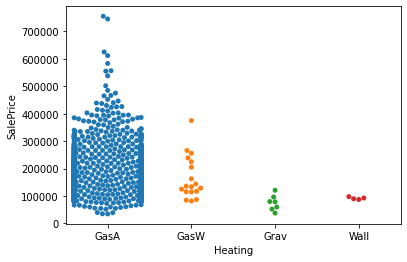

In [209]:
sns.swarmplot(x = 'Heating', y = 'SalePrice', data = df)

In [210]:
df['SalePrice'].groupby(df['HeatingQC']).mean()

HeatingQC
Ex    214892.788043
Fa    124781.111111
Gd    156941.616667
Po     87000.000000
TA    142567.631455
Name: SalePrice, dtype: float64

In [211]:
df['SalePrice'].groupby(df['HeatingQC']).max()

HeatingQC
Ex    755000
Fa    235000
Gd    395000
Po     87000
TA    375000
Name: SalePrice, dtype: int64

In [212]:
replace_dict['HeatingQC'] = {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0}

#### 31. CentralAir

In [213]:
df['CentralAir'].value_counts(dropna = False)

Y    1357
N      91
Name: CentralAir, dtype: int64

In [214]:
df_test['CentralAir'].value_counts(dropna = False)

Y    1358
N     101
Name: CentralAir, dtype: int64

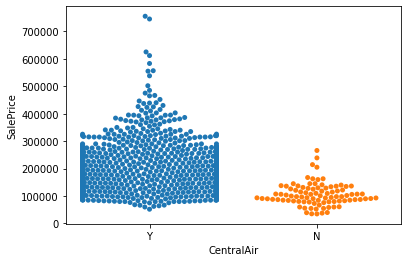

In [215]:
sns.swarmplot(x = 'CentralAir', y = 'SalePrice', data = df)

In [216]:
df['SalePrice'].groupby(df['CentralAir']).mean()

CentralAir
N    105577.879121
Y    186186.775239
Name: SalePrice, dtype: float64

In [217]:
df['SalePrice'].groupby(df['CentralAir']).max()

CentralAir
N    265979
Y    755000
Name: SalePrice, dtype: int64

In [218]:
ohe.append('CentralAir')
drop_cols.append('CentralAir_N')

#### 32. Electrical

In [219]:
df['Electrical'].value_counts(dropna = False)

SBrkr    1323
FuseA      93
FuseF      27
FuseP       3
Mix         1
NaN         1
Name: Electrical, dtype: int64

In [220]:
df[df['Electrical'].isna()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1379,80,RL,73.0,9735,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,SLvl,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,384,384,GasA,Gd,Y,NaN,754,640,0,1394,0,0,2,1,3,1,Gd,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2,400,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,5,2008,WD,Normal,167500


In [221]:
df[['MSSubClass','Electrical']][df['MSSubClass'] == 80]

,MSSubClass,Electrical
54,80,SBrkr
84,80,SBrkr
111,80,SBrkr
186,80,SBrkr
253,80,SBrkr
260,80,SBrkr
262,80,SBrkr
295,80,SBrkr
319,80,SBrkr
324,80,SBrkr


In [222]:
df['Electrical'].fillna('SBrkr', inplace = True)

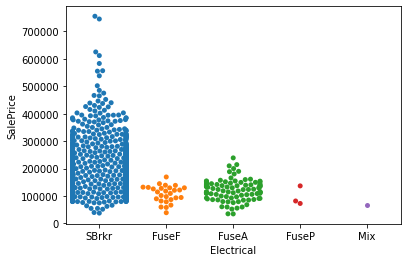

In [223]:
sns.swarmplot(x = 'Electrical', y = 'SalePrice', data = df)

In [224]:
df['SalePrice'].groupby(df['Electrical']).mean()

Electrical
FuseA    122037.720430
FuseF    107675.444444
FuseP     97333.333333
Mix       67000.000000
SBrkr    187044.785498
Name: SalePrice, dtype: float64

In [225]:
df['SalePrice'].groupby(df['Electrical']).max()

Electrical
FuseA    239000
FuseF    169500
FuseP    137000
Mix       67000
SBrkr    755000
Name: SalePrice, dtype: int64

In [226]:
replace_dict['Electrical'] = {'SBrkr': 4, 'FuseA': 3, 'FuseF': 2, 'FuseP': 1, 'Mix': 0}

#### 33. KitchenQual

In [227]:
df['KitchenQual'].value_counts(dropna = False)

TA    726
Gd    585
Ex     99
Fa     38
Name: KitchenQual, dtype: int64

In [228]:
df_test['KitchenQual'].value_counts(dropna = False)

TA     757
Gd     565
Ex     105
Fa      31
NaN      1
Name: KitchenQual, dtype: int64

In [229]:
df_test[df_test['KitchenQual'].isna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
95,1556,50,RL,72.0,10632,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,ClearCr,Norm,Norm,1Fam,1.5Fin,5,3,1917,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,Gd,Fa,No,Unf,0.0,Unf,0.0,689.0,689.0,GasA,Gd,N,SBrkr,725,499,0,1224,0.0,0.0,1,1,3,1,NaN,6,Mod,0,NaN,Detchd,1917.0,Unf,1.0,180.0,Fa,Fa,N,0,0,248,0,0,0,NaN,NaN,NaN,0,1,2010,COD,Normal


In [230]:
df[(df['MSSubClass'] == 50) & (df['MSZoning'] == 'RL') & (df['LotShape'] == 'IR1') & (df['Neighborhood'] == 'ClearCr') & (df['BldgType'] == '1Fam') & (df['HouseStyle'] == '1.5Fin')]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1173,50,RL,138.0,18030,Pave,None,IR1,Bnk,AllPub,Inside,Gtl,ClearCr,Norm,Norm,1Fam,1.5Fin,5,6,1946,1994,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,152,BLQ,469,977,1598,GasA,TA,Y,SBrkr,1636,971,479,3086,0,0,3,0,3,1,Ex,12,Maj1,1,Gd,NaN,NaN,NaN,0,0,NaN,NaN,Y,122,0,0,0,0,0,NaN,MnPrv,NaN,0,3,2007,WD,Normal,200500


In [231]:
# impute the missing tuple on the basis of value obtained from training data
df_test['KitchenQual'].fillna('Ex', inplace = True)

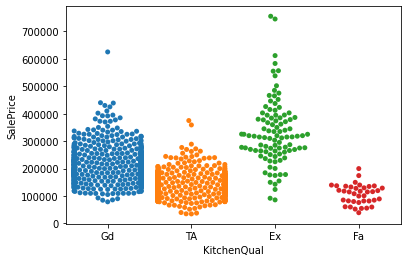

In [232]:
sns.swarmplot(x = 'KitchenQual', y = 'SalePrice', data = df)

In [233]:
df['SalePrice'].groupby(df['KitchenQual']).mean()

KitchenQual
Ex    330257.242424
Fa    106540.605263
Gd    211933.316239
TA    139859.560606
Name: SalePrice, dtype: float64

In [234]:
df['SalePrice'].groupby(df['KitchenQual']).max()

KitchenQual
Ex    755000
Fa    200000
Gd    625000
TA    375000
Name: SalePrice, dtype: int64

In [235]:
replace_dict['KitchenQual'] = {'Ex': 3, 'Gd': 2, 'TA': 1, 'Fa': 0}

#### 34. Functional

In [236]:
df['Functional'].value_counts(dropna = False)

Typ     1349
Min2      34
Min1      31
Maj1      14
Mod       14
Maj2       5
Sev        1
Name: Functional, dtype: int64

In [237]:
df_test['Functional'].value_counts(dropna = False)

Typ     1357
Min2      36
Min1      34
Mod       20
Maj1       5
Maj2       4
NaN        2
Sev        1
Name: Functional, dtype: int64

In [238]:
df_test[df_test['Functional'].isna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
756,2217,20,RL,80.0,14584,Pave,None,Reg,Low,AllPub,Inside,Mod,IDOTRR,Norm,Norm,1Fam,1Story,1,5,1952,1952,Gable,CompShg,AsbShng,VinylSd,None,0.0,Fa,Po,Slab,None,None,None,None,0.0,None,0.0,0.0,0.0,Wall,Po,N,FuseA,733,0,0,733,0.0,0.0,1,0,2,1,Fa,4,NaN,0,NaN,Attchd,1952.0,Unf,2.0,487.0,Fa,Po,N,0,0,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Abnorml
1013,2474,50,RM,60.0,10320,Pave,Grvl,Reg,Lvl,AllPub,Corner,Gtl,IDOTRR,Artery,Norm,1Fam,1.5Fin,4,1,1910,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Fa,Fa,CBlock,TA,Fa,No,Unf,0.0,Unf,0.0,771.0,771.0,GasA,Fa,Y,SBrkr,866,504,114,1484,0.0,0.0,2,0,3,1,TA,6,NaN,0,NaN,Detchd,1910.0,Unf,1.0,264.0,TA,Fa,N,14,211,0,0,84,0,NaN,NaN,NaN,0,9,2007,COD,Abnorml


In [239]:
df[(df['MSSubClass'] == 20) & (df['MSZoning'] == 'RL') & (df['BldgType'] == '1Fam') & (df['HouseStyle'] == '1Story')]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
6,20,RL,75.0,10084,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
10,20,RL,70.0,11200,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,5,1965,1965,Hip,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,906,Unf,0,134,1040,GasA,Ex,Y,SBrkr,1040,0,0,1040,1,0,1,0,3,1,TA,5,Typ,0,NaN,Detchd,1965.0,Unf,1,384,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,129500
12,20,RL,NaN,12968,Pave,None,IR2,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,6,1962,1962,Hip,CompShg,HdBoard,Plywood,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,737,Unf,0,175,912,GasA,TA,Y,SBrkr,912,0,0,912,1,0,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1962.0,Unf,1,352,TA,TA,Y,140,0,0,0,176,0,NaN,NaN,NaN,0,9,2008,WD,Normal,144000
13,20,RL,91.0,10652,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,7,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,Stone,306.0,Gd,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,1494,1494,GasA,Ex,Y,SBrkr,1494,0,0,1494,0,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,3,840,TA,TA,Y,160,33,0,0,0,0,NaN,NaN,NaN,0,8,2007,New,Partial,279500
14,20,RL,NaN,10920,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,MetalSd,MetalSd,BrkFace,212.0,TA,TA,CBlock,TA,TA,No,BLQ,733,Unf,0,520,1253,GasA,TA,Y,SBrkr,1253,0,0,1253,1,0,1,1,2,1,TA,5,Typ,1,Fa,Attchd,1960.0,RFn,1,352,TA,TA,Y,0,213,176,0,0,0,NaN,GdWo,NaN,0,5,2008,WD,Normal,157000
16,20,RL,NaN,11241,Pave,None,IR1,Lvl,AllPub,CulDSac,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,7,1970,1970,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,180.0,TA,TA,CBlock,TA,TA,No,ALQ,578,Unf,0,426,1004,GasA,Ex,Y,SBrkr,1004,0,0,1004,1,0,1,0,2,1,TA,5,Typ,1,TA,Attchd,1970.0,Fin,2,480,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,Shed,700,3,2010,WD,Normal,149000
18,20,RL,66.0,13695,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,RRAe,Norm,1Fam,1Story,5,5,2004,2004,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,TA,TA,No,GLQ,646,Unf,0,468,1114,GasA,Ex,Y,SBrkr,1114,0,0,1114,1,0,1,1,3,1,Gd,6,Typ,0,NaN,Detchd,2004.0,Unf,2,576,TA,TA,Y,0,102,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal,159000
19,20,RL,70.0,7560,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1958,1965,Hip,CompShg,BrkFace,Plywood,None,0.0,TA,TA,CBlock,TA,TA,No,LwQ,504,Unf,0,525,1029,GasA,TA,Y,SBrkr,1339,0,0,1339,0,0,1,0,3,1,TA,6,Min1,0,NaN,Attchd,1958.0,Unf,1,294,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,5,2009,COD,Abnorml,139000
22,20,RL,75.0,9742,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,8,5,2002,2002,Hip,CompShg,VinylSd,VinylSd,BrkFace,281.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1777,1777,GasA,Ex,Y,SBrkr,1795,0,0,1795,0,0,2,0,3,1,Gd,7

In [240]:
# impute value for feature 'Functional'
df_test.at[756, 'Functional'] = 'Typ'

In [241]:
df_test[df_test['Functional'].isna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1013,2474,50,RM,60.0,10320,Pave,Grvl,Reg,Lvl,AllPub,Corner,Gtl,IDOTRR,Artery,Norm,1Fam,1.5Fin,4,1,1910,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Fa,Fa,CBlock,TA,Fa,No,Unf,0.0,Unf,0.0,771.0,771.0,GasA,Fa,Y,SBrkr,866,504,114,1484,0.0,0.0,2,0,3,1,TA,6,NaN,0,NaN,Detchd,1910.0,Unf,1.0,264.0,TA,Fa,N,14,211,0,0,84,0,NaN,NaN,NaN,0,9,2007,COD,Abnorml


In [242]:
df[(df['MSSubClass'] == 50) & (df['MSZoning'] == 'RM') & (df['Neighborhood'] == 'IDOTRR') &(df['BldgType'] == '1Fam') & (df['HouseStyle'] == '1.5Fin')]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
104,50,RM,NaN,7758,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,IDOTRR,Norm,Norm,1Fam,1.5Fin,7,4,1931,1950,Gable,CompShg,Stucco,Stucco,BrkFace,600.0,TA,Fa,PConc,TA,TA,No,LwQ,224,Unf,0,816,1040,GasA,Ex,Y,FuseF,1226,592,0,1818,0,0,1,1,4,1,TA,7,Typ,2,TA,Detchd,1951.0,Unf,1,240,TA,TA,Y,0,0,0,0,184,0,NaN,NaN,NaN,0,6,2007,WD,Normal,169500
108,50,RM,85.0,8500,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,IDOTRR,Artery,Norm,1Fam,1.5Fin,5,7,1919,2005,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,793,793,GasW,TA,N,FuseF,997,520,0,1517,0,0,2,0,3,1,Fa,7,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,144,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,115000
121,50,RM,50.0,6060,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1.5Fin,4,5,1939,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,TA,PConc,TA,TA,No,Unf,0,Unf,0,732,732,GasA,Gd,Y,SBrkr,772,351,0,1123,0,0,1,0,3,1,TA,4,Typ,0,NaN,Detchd,1979.0,Unf,1,264,TA,TA,P,0,0,140,0,0,0,NaN,MnPrv,NaN,0,6,2007,WD,Normal,100000
296,50,RM,75.0,13710,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1.5Fin,5,5,1950,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,BLQ,420,Unf,0,490,910,GasA,TA,Y,FuseA,910,648,0,1558,0,0,1,1,4,1,TA,6,Typ,0,NaN,Attchd,1950.0,Unf,1,282,TA,TA,Y,289,0,0,0,0,0,NaN,MnPrv,NaN,0,6,2007,WD,Normal,152000
307,50,RM,NaN,7920,Pave,Grvl,IR1,Lvl,AllPub,Inside,Gtl,IDOTRR,Artery,Norm,1Fam,1.5Fin,6,7,1920,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,Fa,CBlock,TA,TA,No,Unf,0,Unf,0,319,319,GasA,TA,Y,FuseA,1035,371,0,1406,0,0,1,0,3,1,Fa,6,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,N,0,144,0,0,0,0,NaN,MnPrv,NaN,0,3,2008,WD,Normal,89500
448,50,RM,50.0,8600,Pave,None,Reg,Bnk,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1.5Fin,6,6,1937,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,780,780,GasA,TA,Y,SBrkr,780,596,0,1376,0,0,2,0,3,1,TA,7,Typ,1,Gd,Detchd,1937.0,Unf,1,198,TA,TA,N,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,119500
601,50,RM,50.0,9000,Pave,None,Reg,Bnk,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1.5Fin,6,6,1937,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,Gd,PConc,TA,TA,No,Unf,0,Unf,0,780,780,GasA,TA,Y,SBrkr,780,595,0,1375,0,0,1,1,3,1,Gd,6,Typ,1,Gd,Detchd,1979.0,Unf,1,544,TA,TA,P,0,162,0,0,126,0,NaN,NaN,NaN,0,12,2007,WD,Normal,141000
653,50,RM,60.0,10320,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1.5Fin,6,7,1906,1995,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,756,756,GasA,Ex,Y,SBrkr,756,713,0,1469,0,0,1,0,3,1,TA,7,Typ,0,NaN,Detchd,1906.0,Unf,1,216,TA,TA,Y,57,0,239,0,0,0,NaN,MnPrv,NaN,0,6,2008,WD,Normal,135000
1333,50,RM,60.0,7200,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,IDOTRR,Norm,Norm,1Fam,1.5Fin,5,6,1938,1995,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,803,803,GasA,Ex,Y,SBrkr,803,557,0,1360,0,0,1,1,2,1,Gd,6,Typ,0,NaN,Detchd,1951.0,Unf,1,297,TA,TA,Y,0,65,190,0,0,0,NaN,MnPrv,NaN,0,7,2006,WD,Normal,125500
1385,50,RM,40.0,5436,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1.5Fin,4,8,1922,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,BrkTil,TA,TA,No,BLQ,735,Unf,0,61,796,GasA,Gd,Y,SBrkr,796,358,0,1154,1,0,1,0,3,1,Gd,7,Typ,0,NaN,

In [243]:
df_test.at[1013, 'Functional'] = 'Typ'

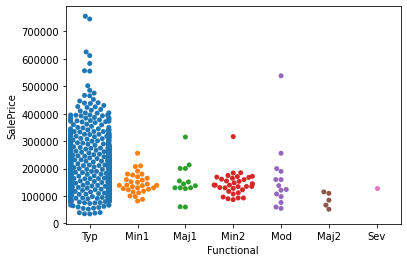

In [244]:
sns.swarmplot(x = 'Functional', y = 'SalePrice', data = df)

In [245]:
df['SalePrice'].groupby(df['Functional']).mean()

Functional
Maj1    153948.142857
Maj2     85800.000000
Min1    146385.483871
Min2    144240.647059
Mod     163171.428571
Sev     129000.000000
Typ     183708.847294
Name: SalePrice, dtype: float64

In [ ]:
df['SalePrice'].groupby(df['Functional']).max()

In [ ]:
replace_dict['Functional'] = {'Typ': 6, 'Mod': 5, 'Maj1': 4, 'Min1': 3, 'Min2': 2, 'Maj2': 1, 'Sev': 0}

#### 35. FireplaceQu

In [ ]:
df['FireplaceQu'].value_counts(dropna = False)

In [ ]:
df_test['FireplaceQu'].value_counts(dropna = False)

In [ ]:
df['FireplaceQu'].fillna('None', inplace = True)
df_test['FireplaceQu'].fillna('None', inplace = True)

In [ ]:
sns.swarmplot(x = 'FireplaceQu', y = 'SalePrice', data = df)

In [ ]:
df['SalePrice'].groupby(df['FireplaceQu']).mean()

In [ ]:
df['SalePrice'].groupby(df['FireplaceQu']).max()

In [ ]:
replace_dict['FireplaceQu'] = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'None': 1, 'Po': 0}

#### 36. GarageType

In [ ]:
df['GarageType'].value_counts(dropna = False)

In [ ]:
df_test['GarageType'].value_counts(dropna = False)

In [ ]:
df['GarageType'].fillna('None', inplace = True)
df_test['GarageType'].fillna('None', inplace = True)

In [ ]:
sns.swarmplot(x = 'GarageType', y = 'SalePrice', data = df)

In [ ]:
df['SalePrice'].groupby(df['GarageType']).mean()

In [ ]:
df['SalePrice'].groupby(df['GarageType']).max()

In [ ]:
replace_dict['GarageType'] = {'Attchd': 6, 'BuiltIn': 5, 'Basment': 4, '2Types': 3, 'Detchd': 2, 'None': 1, 'CarPort': 0}

#### 37. GarageFinish

In [ ]:
df['GarageFinish'].value_counts(dropna = False)

In [ ]:
df_test['GarageFinish'].value_counts(dropna = False)

In [ ]:
df['GarageFinish'].fillna('None', inplace = True)
df_test['GarageFinish'].fillna('None', inplace = True)

In [ ]:
sns.swarmplot(x = 'GarageFinish', y = 'SalePrice', data = df)

In [ ]:
df['SalePrice'].groupby(df['GarageFinish']).mean()

In [ ]:
df['SalePrice'].groupby(df['GarageFinish']).max()

In [ ]:
replace_dict['GarageFinish'] = {'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0}

#### 38. GarageQual 

In [ ]:
df['GarageQual'].value_counts(dropna = False)

In [ ]:
df_test['GarageQual'].value_counts(dropna = False)

In [ ]:
df['GarageQual'].fillna('None', inplace = True)
df_test['GarageQual'].fillna('None', inplace = True)

In [ ]:
sns.swarmplot(x = 'GarageQual', y = 'SalePrice', data = df)

In [ ]:
df['SalePrice'].groupby(df['GarageQual']).mean()

In [ ]:
df['SalePrice'].groupby(df['GarageQual']).max()

In [ ]:
replace_dict['GarageQual'] = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'None': 1, 'Po': 0}

#### 39. GarageCond

In [ ]:
df['GarageCond'].value_counts(dropna = False)

In [ ]:
df_test['GarageCond'].value_counts(dropna = False)

In [ ]:
df['GarageCond'].fillna('None', inplace = True)
df_test['GarageCond'].fillna('None', inplace = True)

In [ ]:
sns.swarmplot(x = 'GarageCond', y = 'SalePrice', data = df)

In [ ]:
df['SalePrice'].groupby(df['GarageCond']).mean()

In [ ]:
df['SalePrice'].groupby(df['GarageCond']).max()

In [ ]:
replace_dict['GarageCond'] = {'TA': 5, 'Gd': 4, 'Ex': 3, 'Fa': 2, 'None': 1, 'Po': 0}

#### 40. PavedDrive 

In [ ]:
df['PavedDrive'].value_counts(dropna = False)

In [ ]:
sns.swarmplot(x = 'PavedDrive', y = 'SalePrice', data = df)

In [ ]:
df['SalePrice'].groupby(df['PavedDrive']).mean()

In [ ]:
df['SalePrice'].groupby(df['PavedDrive']).max()

In [ ]:
replace_dict['PavedDrive'] = {'Y': 2, 'N': 1, 'P': 0}

#### 41. PoolQC

In [ ]:
df['PoolQC'].value_counts(dropna = False)

In [ ]:
df_test['PoolQC'].value_counts(dropna = False)

In [ ]:
df['PoolQC'].fillna('None', inplace = True)
df_test['PoolQC'].fillna('None', inplace = True)

In [ ]:
sns.swarmplot(x = 'PoolQC', y = 'SalePrice', data = df)

In [ ]:
ohe.append('PoolQC')

#### 42. Fence

In [ ]:
df['Fence'].value_counts(dropna = False)

In [ ]:
df_test['Fence'].value_counts(dropna = False)

In [ ]:
df['Fence'].fillna('None', inplace = True)
df_test['Fence'].fillna('None', inplace = True)

In [ ]:
sns.swarmplot(x = 'Fence', y = 'SalePrice', data = df)

In [ ]:
df['SalePrice'].groupby(df['Fence']).mean()

In [ ]:
df['SalePrice'].groupby(df['Fence']).max()

In [ ]:
ohe.append('Fence')

#### 43. SaleType

In [ ]:
df['SaleType'].value_counts(dropna = False)

In [ ]:
df_test['SaleType'].value_counts(dropna = False)

In [ ]:
df_test[df_test['SaleType'].isna()]

In [ ]:
df_test[(df_test['SaleCondition'] == 'Normal') & (df_test['MSSubClass'] == 20) & (df_test['MSZoning'] == 'RL')]

In [ ]:
df_test['SaleType'].fillna('WD', inplace = True)

In [ ]:
ohe.append('SaleType')

#### 44. SaleCondition

In [ ]:
df['SaleCondition'].value_counts(dropna = False)

In [ ]:
sns.swarmplot(x = 'SaleCondition', y = 'SalePrice', data = df)

In [ ]:
df['SalePrice'].groupby(df['SaleCondition']).mean()

In [ ]:
df['SalePrice'].groupby(df['SaleCondition']).max()

In [ ]:
ohe.append('SaleCondition')

#### 45. MiscFeature

In [ ]:
df['MiscFeature'].value_counts(dropna = False)

In [ ]:
df_test['MiscFeature'].value_counts(dropna = False)

In [ ]:
# drop the single tuple with value 'TenC' for MiscFeature to reduce model complexity
df.drop(df[df['MiscFeature'] == 'TenC'].index, inplace = True)

In [ ]:
df['MiscFeature'].fillna('None', inplace = True)
df_test['MiscFeature'].fillna('None', inplace = True)

In [ ]:
sns.swarmplot(x = 'MiscFeature', y = 'SalePrice', data = df)

In [ ]:
df['SalePrice'].groupby(df['MiscFeature']).mean()

In [ ]:
df['SalePrice'].groupby(df['MiscFeature']).max()

In [ ]:
ohe.append('MiscFeature')

In [ ]:
cat_cols = [x for x in df.columns if df[x].dtype == 'object']
print("NaN value check for Training data")
for col in cat_cols:
    print("{} : {}".format(col, df[col].isna().sum()))

In [ ]:
print("NaN value check for Testing data")
for col in cat_cols:
    print("{} : {}".format(col, df_test[col].isna().sum()))

In [ ]:
replace_dict

In [ ]:
df = df.replace(replace_dict)
df.head()

In [ ]:
y = df['SalePrice'].values
drop_cols.append('SalePrice')

In [ ]:
df = pd.get_dummies(df, columns = ohe)
df.drop(drop_cols, axis = 1, inplace = True)
df.head()

In [ ]:
df.dtypes

### Baseline Model

Train an XGBoost Regression Model that automatically deals with missing values in numeric features

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(df, y, test_size = 0.25, random_state = 42)

In [ ]:
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

In [ ]:
y_pred = xgb.predict(X_val)
math.sqrt(mean_squared_log_error(y_val, y_pred))

### Visualization of Numeric Features + Feature Transformation

In [ ]:
num_cols.remove('YearBuilt')

In [ ]:
num_df = df[num_cols]
sns.heatmap(num_df.corr())

In [ ]:
miss_cols = []
for col in num_cols:
    if df[col].isna().sum() > 0:
        miss_cols.append(col)
    print("{} : {}".format(col, df[col].isna().sum()))

In [ ]:
test_miss_cols = []
for col in num_cols:
    if df_test[col].isna().sum() > 0:
        test_miss_cols.append(col)
    print("{} : {}".format(col, df_test[col].isna().sum()))

In [ ]:
"""plot a histogram for a given feature as well as a scatter plot 
against the target feature i.e. SalePrice"""
def plot_feature(df: pd.DataFrame, column: str, target: str):
    plt.subplot(1, 2, 1)
    plt.hist(df[column])
    plt.subplot(1, 2, 2)
    plt.scatter(df[column], y)
    plt.xlabel(column)
    plt.ylabel(target)
    plt.subplots_adjust(wspace = 1)
    plt.tight_layout()
    plt.show()

In [ ]:
target = 'SalePrice'

In [ ]:
def standardize(x):
    return (x - np.mean(x)) / np.std(x)

#### 1. MSSubClass

In [ ]:
plot_feature(df, 'MSSubClass', target)

In [ ]:
temp = df['MSSubClass'].values
std_temp = standardize(temp)
sns.distplot(np.log10(1 + std_temp))

In [ ]:
sns.distplot(1 + np.log1p(df['MSSubClass']), bins = 25)

In [ ]:
plot_feature(df, 'LotFrontage', target)

In [ ]:
"""A custom implementation of the the K-Nearest Neighbors Algorithm (KNNImputer) using the most correlated
independent features"""
def knn_mcf(pd.DataFrame: df, target, miss_cols, method = 'pearsonr', neighbors = 5):
    correlate = pearsonr
    if method == 'spearmanr':
        correlate = spearmanr
    tdf = df[df[target].notna()]
    corr_cols = []
    print("Correlation w.r.t {}".format(target))
    for col in num_cols:
        if col not in miss_cols:
            print("{} vs {} : {}".format(target, col, correlate(tdf[target].values, tdf[col].values)[0]))
            corr_cols.append((correlate(tdf[target].values, tdf[col].values)[0], col))
    print('{} most correlated features w.r.t {}'.format(neighbors, target))
    print(sorted(corr_cols, reverse = True)[:neighbors])
    print()
    final_corr_cols = [x[1] for x in sorted(corr_cols, reverse = True)[:neighbors]]
    final_corr_cols.append(target)
    random.shuffle(final_corr_cols)
    temp_df = df.loc[:, final_corr_cols]
    knn = KNNImputer(n_neighbors = neighbors)
    temp = knn.fit_transform(temp_df)
    df[target] = temp[:, final_corr_cols.index(target)].T
    miss_cols.remove(target)
    return df, miss_cols 

In [ ]:
n = len(miss_cols)
for i in range(n):
    df, miss_cols = knn_mcf(df, miss_cols[0], miss_cols, 'spearmanr')

In [ ]:
for col in num_cols:
    print('{} : {}'.format(col, df[col].isna().sum()))

In [ ]:
y.size

In [ ]:
drop_cols

In [ ]:
df = pd.get_dummies(df, columns = ohe)

In [ ]:
df = df.replace(replace_dict)
df.head()

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(df, y, test_size = 0.225, random_state = 42)

In [ ]:
log_df = df.copy()
log_df.head()

In [ ]:
sc = MinMaxScaler()
data = sc.fit_transform(log_df)

In [ ]:
data.shape

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(data, y, test_size = 0.225, random_state = 42)

In [ ]:
tsc = MinMaxScaler()
y_train_scaled = tsc.fit_transform(y_train.reshape(-1, 1))

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train_scaled)

In [ ]:
y_pred = lr.predict(X_val)
# y_pred = xgb.predict(X_val)
sp = tsc.inverse_transform(y_pred.reshape(-1, 1))
sp[:5]

In [ ]:
y_val[:5]

In [ ]:
math.sqrt(mean_squared_log_error(y_val, sp))

In [ ]:
df['Remod_gap'] = df['YearRemodAdd'] - df['YearBuilt']